In [4]:
from sklearn.datasets import load_iris
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [8]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [5]:
dt_clf = DecisionTreeClassifier(random_state=156)

iris_data = load_iris()
X_train, X_test , y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=11)

dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

In [6]:
export_graphviz(dt_clf, out_file='tree.dot', class_names=iris_data.target_names,
               feature_names=iris_data.feature_names, impurity=True, filled=True)

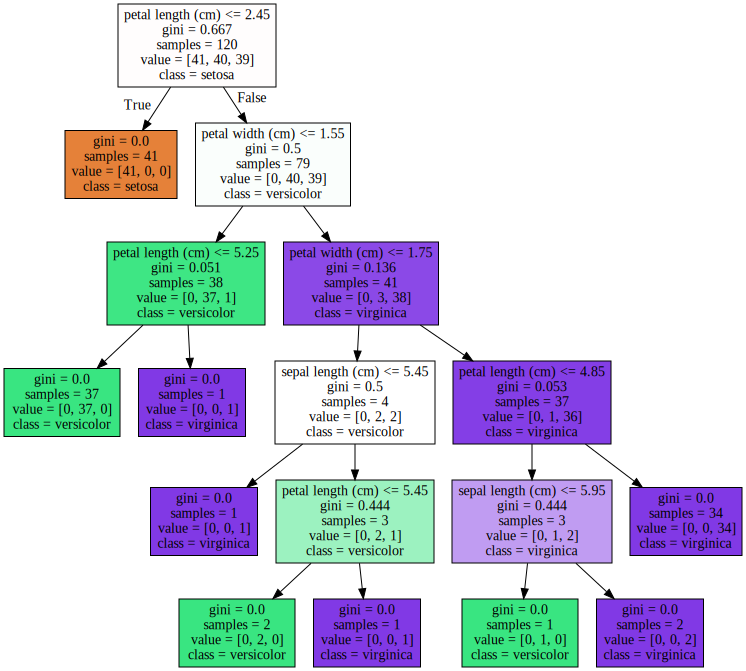

In [9]:
import graphviz

with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

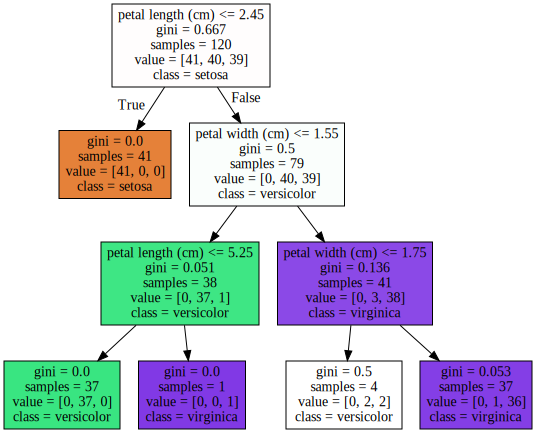

In [10]:
dt_clf = DecisionTreeClassifier(random_state=156, max_depth=3)
dt_clf.fit(X_train, y_train)

export_graphviz(dt_clf, out_file='tree.dot', class_names=iris_data.target_names,
               feature_names=iris_data.feature_names, impurity=True, filled=True)

import graphviz
with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

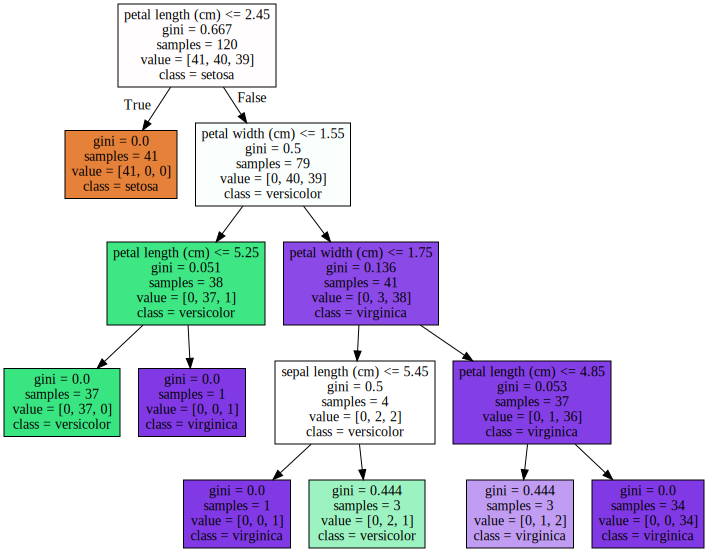

In [11]:
dt_clf = DecisionTreeClassifier(random_state=156, min_samples_split=4)
dt_clf.fit(X_train, y_train)

export_graphviz(dt_clf, out_file='tree.dot', class_names=iris_data.target_names,
               feature_names=iris_data.feature_names, impurity=True, filled=True)

import graphviz

with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

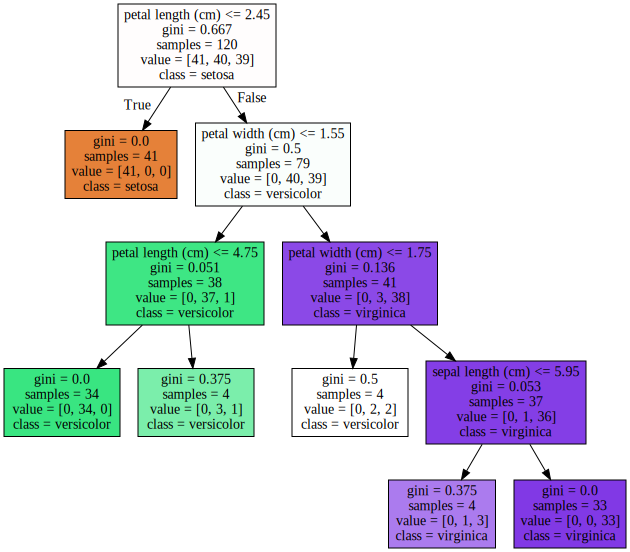

In [12]:
dt_clf = DecisionTreeClassifier(random_state=156, min_samples_leaf=4)
dt_clf.fit(X_train, y_train)

export_graphviz(dt_clf, out_file='tree.dot', class_names=iris_data.target_names,
               feature_names=iris_data.feature_names, impurity=True, filled=True)

import graphviz

with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix

In [16]:
titanic = pd.read_csv('titanic_data_clean.csv')

In [17]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Fare      891 non-null    float64
 3   Survived  891 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 28.0+ KB


In [18]:
t_features = titanic[titanic.columns[:-1]]
t_target = titanic[titanic.columns[-1]]

In [19]:
t_features['Sex'] = t_features.Sex.map({'female':0, 'male':1})

In [20]:
t_features = pd.get_dummies(data = t_features, columns = ['Pclass'], prefix = 'Pclass')

In [21]:
train_features, test_features, train_target, test_target = train_test_split(t_features, t_target, test_size=0.2, random_state=20221, stratify=t_target)

In [22]:
pd.DataFrame(train_target)['Survived'].value_counts()

0    439
1    273
Name: Survived, dtype: int64

In [23]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [24]:
import sklearn
x_s = sklearn.utils.shuffle(train_features, random_state=2021)
y_s = sklearn.utils.shuffle(train_target, random_state=2021)

import imblearn
from imblearn.under_sampling import RandomUnderSampler
train_features_us, train_target_us = RandomUnderSampler(random_state=2021).fit_resample(x_s, y_s)

In [25]:
pd.DataFrame(train_target_us)['Survived'].value_counts()

0    273
1    273
Name: Survived, dtype: int64

In [26]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='gini', random_state=2021)
tree_fit = tree.fit(train_features_us, train_target_us)

In [27]:
from sklearn.tree import export_graphviz

In [29]:
feature_names = train_features_us.columns.tolist()
target_name = np.array(['Dead', 'Survive'])

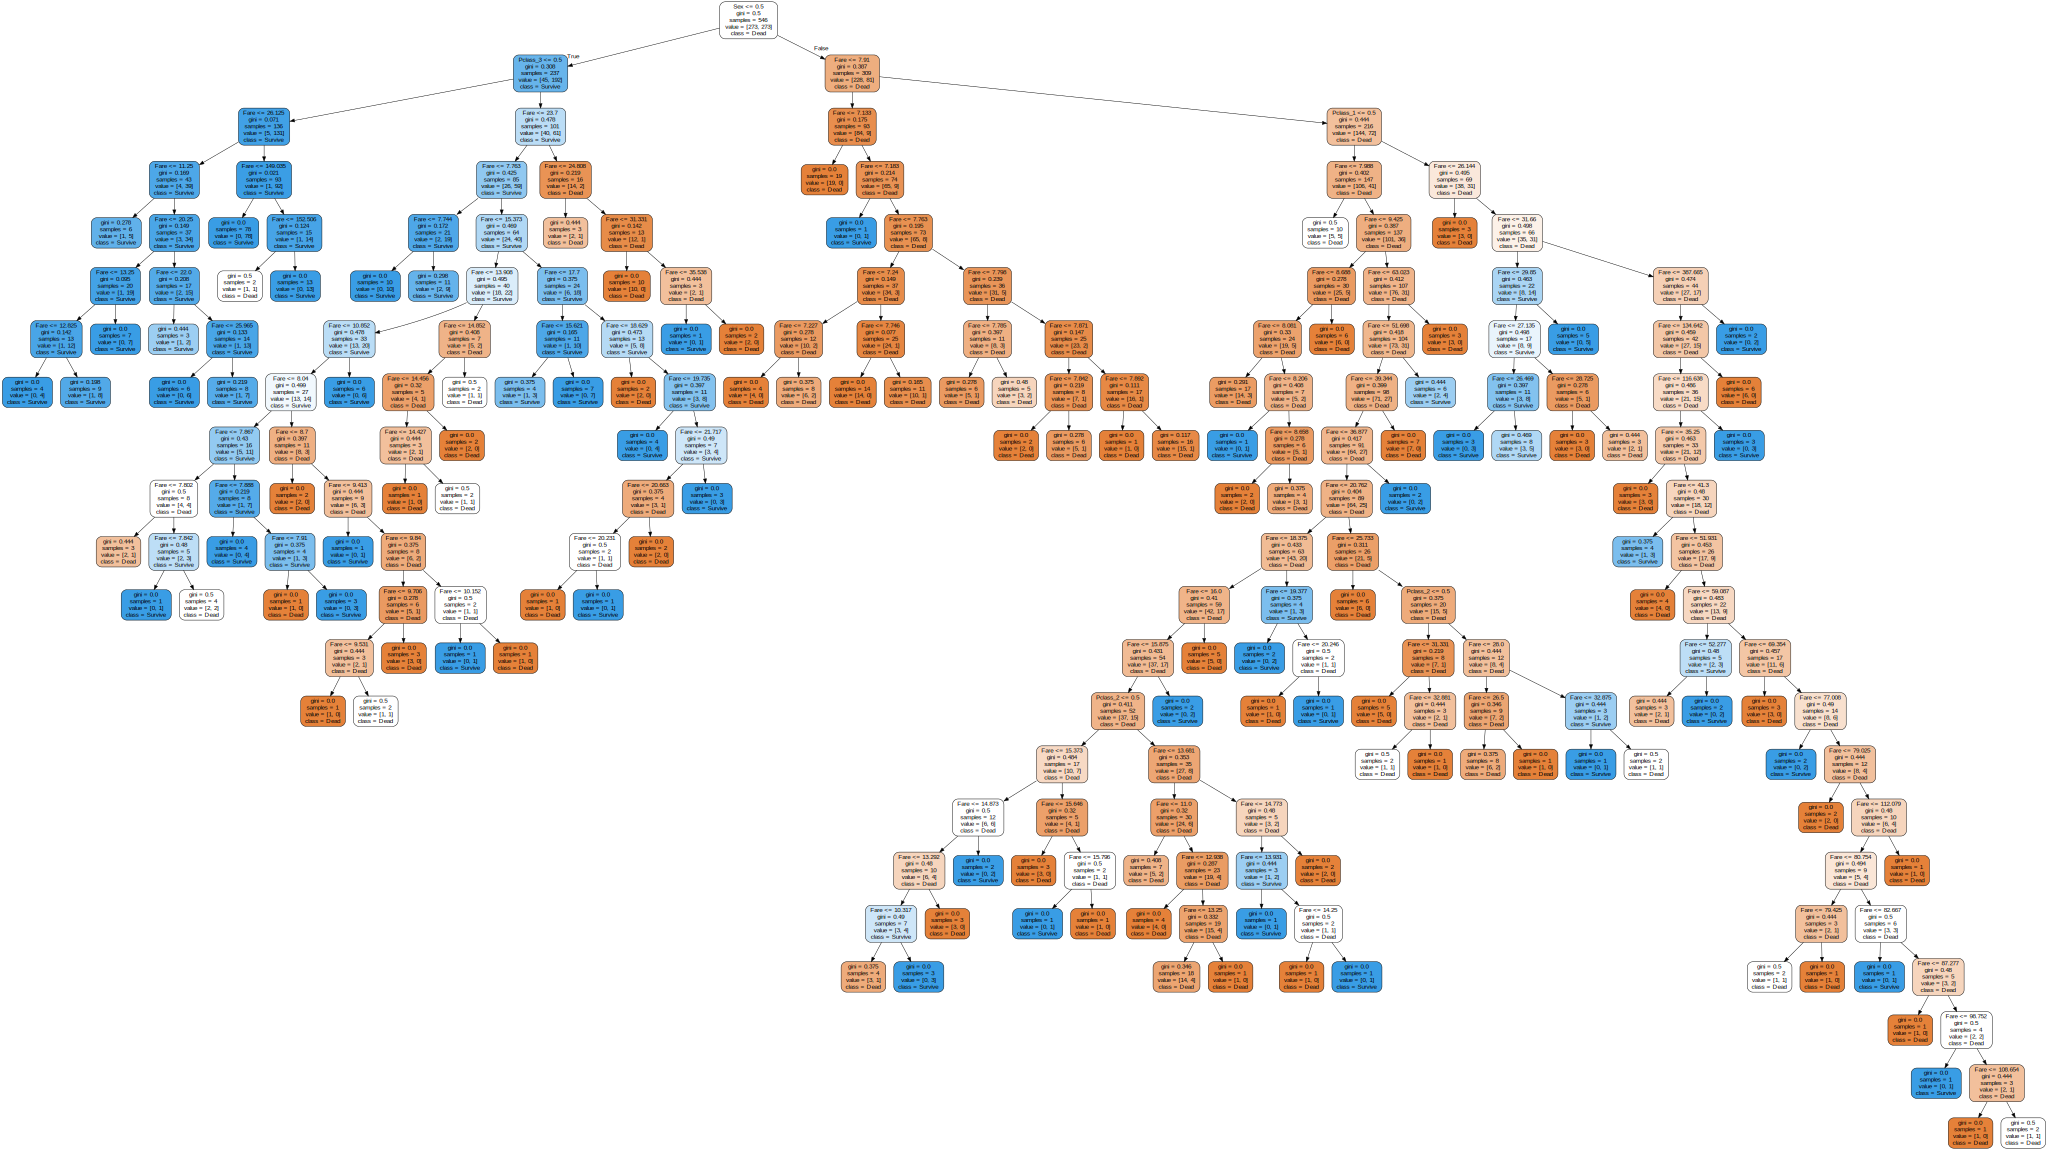

In [31]:
dot_data = export_graphviz(tree, filled = True,
                          rounded= True,
                          class_names = target_name,
                          feature_names = feature_names)

import graphviz
graphviz.Source(dot_data)

In [32]:
scores = cross_validate(estimator= tree, X= train_features_us,
                       y= train_target_us,
                       scoring=['accuracy'],
                       cv=10,
                       n_jobs=-1,
                       return_train_score=False)

print('cv accuracy : %s'%scores['test_accuracy'])
print('cv accuracy(mead): %.3f(std : %.3f)' %(np.mean(scores['test_accuracy']),
                                             np.std(scores['test_accuracy'])))

cv accuracy : [0.8        0.81818182 0.74545455 0.81818182 0.78181818 0.8
 0.68518519 0.7962963  0.7962963  0.88888889]
cv accuracy(mead): 0.793(std : 0.050)


In [33]:
y_pred = tree.predict(test_features)
y_pred

array([1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1], dtype=int64)

In [34]:
confmat = pd.DataFrame(confusion_matrix(test_target, y_pred),
                      index=['True[0]', 'True[1]'],
                      columns=['Predict[0]','Predict[1]'])

In [35]:
confmat

,Predict[0],Predict[1]
True[0],92,18
True[1],15,54


In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

In [37]:
print('정확도 :', accuracy_score(test_target, y_pred))
print('정밀도 :', precision_score(y_true=test_target, y_pred=y_pred) )
print('재현율 :', recall_score(y_true=test_target, y_pred=y_pred))
print('AUC :', roc_auc_score(test_target, y_pred))

정확도 : 0.8156424581005587
정밀도 : 0.75
재현율 : 0.782608695652174
AUC : 0.8094861660079051


In [39]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_target, tree.predict_proba(test_features)[:,1])

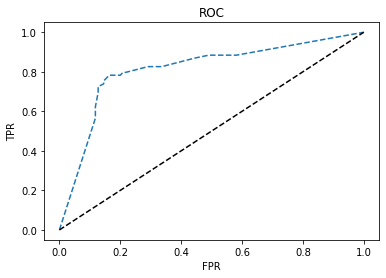

In [40]:
plt.plot(fpr, tpr, '--', label = 'Decision tree')
plt.plot([0,1],[0,1], 'k--', label='random guess')
plt.plot([fpr],[tpr],'r-',ms=10)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.show()

In [41]:
dt_clf = DecisionTreeClassifier(random_state=2021)
print('기본 파라미터:', dt_clf.get_params())

기본 파라미터: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 2021, 'splitter': 'best'}


In [43]:
param_r1 = [1,2,3,4,5,6,7,8,9,10]
param_r2 = [10,20,30,40,50]
param_r3 = ['gini','entropy']

param_grid = [{'max_depth':param_r1,
             'min_samples_leaf':param_r2,
             'criterion':param_r3}]
gs = GridSearchCV(estimator=dt_clf,
                 param_grid= param_grid,
                 scoring= 'accuracy',
                 cv=10,
                 n_jobs=-1)

gs= gs.fit(train_features_us, train_target_us)

print('최고 평균 정확도:', gs.best_score_)
print('최적의 하이퍼 파라미터:', gs.best_params_)

최고 평균 정확도: 0.7874074074074073
최적의 하이퍼 파라미터: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 10}


In [44]:
best_tree = gs.best_estimator_
best_tree.fit(train_features_us, train_target_us)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=10,
                       random_state=2021)

In [45]:
y_pred = best_tree.predict(test_features)

In [47]:
confmat = pd.DataFrame(confusion_matrix(test_target, y_pred),
                      index=['True[0]','True[1]'],
                      columns=['Predict[0]', 'Predict[1]'])
confmat

,Predict[0],Predict[1]
True[0],98,12
True[1],29,40


In [48]:
print('정확도 :', accuracy_score(test_target, y_pred))
print('정밀도 :', precision_score(y_true=test_target, y_pred=y_pred) )
print('재현율 :', recall_score(y_true=test_target, y_pred=y_pred))
print('AUC :', roc_auc_score(test_target, y_pred))

정확도 : 0.770949720670391
정밀도 : 0.7692307692307693
재현율 : 0.5797101449275363
AUC : 0.7353096179183135


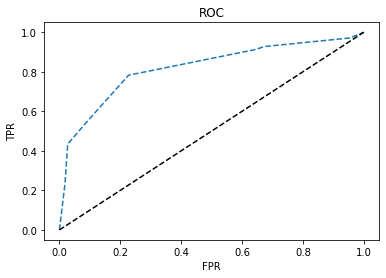

In [49]:
fpr, tpr, thresholds = roc_curve(test_target, best_tree.predict_proba(test_features)[:,1])

plt.plot(fpr, tpr, '--', label = 'Decision tree')
plt.plot([0,1],[0,1], 'k--', label='random guess')
plt.plot([fpr],[tpr],'r-',ms=10)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.show()

In [52]:
feature_names = train_features_us.columns.tolist()
target_name = np.array(['Dead','Survive'])

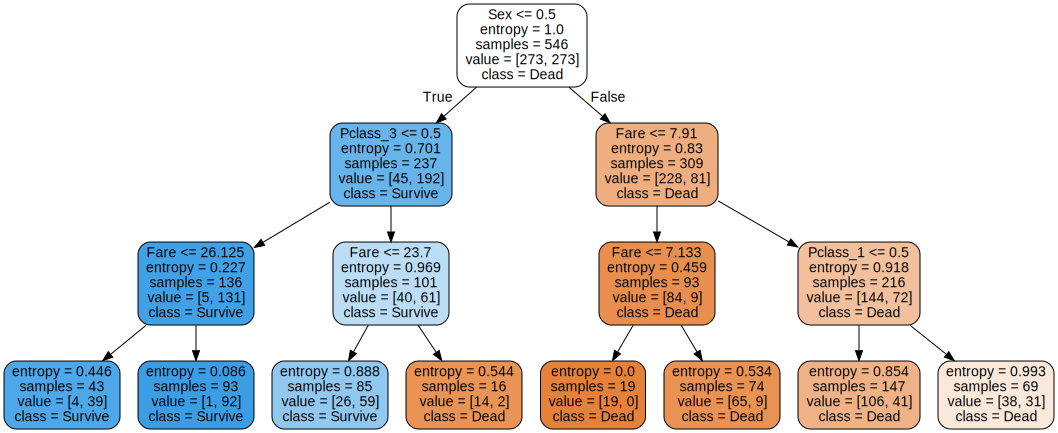

In [53]:
dot_data_best = export_graphviz(best_tree,
                               filled=True,
                               rounded=True,
                               class_names = target_name,
                               feature_names= feature_names)

graphviz.Source(dot_data_best)

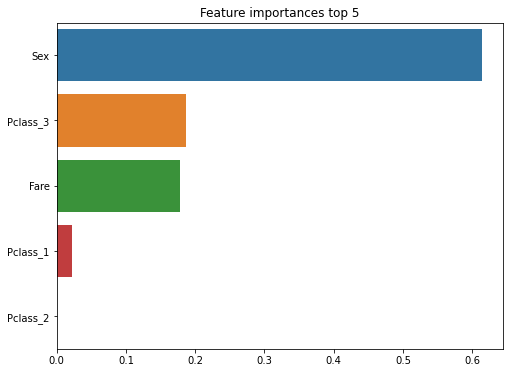

In [55]:
feature_importance_values = best_tree.feature_importances_
feature_importances = pd.Series(feature_importance_values, index=train_features_us.columns)

feature_top5 = feature_importances.sort_values(ascending=False)[:5]

plt.figure(figsize=[8,6])
plt.title('Feature importances top 5')
sns.barplot(x=feature_top5, y=feature_top5.index)
plt.show()